In [2]:
# PyTorch provides two data primitives: torch.utils.data.DataLoader and torch.utils.data.Dataset 
# that allow you to use pre-loaded datasets as well as your own data. Dataset stores the samples 
# and their corresponding labels, and DataLoader wraps an iterable around the Dataset to enable 
# easy access to the samples.

# Preloaded datasets
# https://pytorch.org/vision/stable/datasets.html
# https://pytorch.org/text/stable/datasets.html
# https://pytorch.org/audio/stable/datasets.html

# https://matplotlib.org/stable/

In [4]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

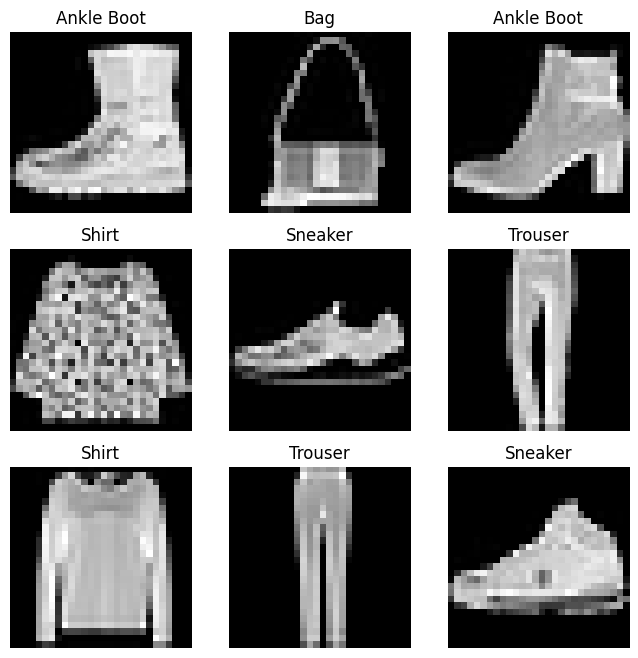

In [10]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()